# Abstract

Powered by Dark Sky (https://darksky.net/poweredby/)

In [1]:
# imports

# misc
import datetime
import os, sys, shutil

# basics
import numpy as np
from numpy import loadtxt
import pandas as pd
from tqdm import tqdm

# charting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


# for darksky api
import json
from pandas.io.json import json_normalize
import requests

In [2]:
# load the data
df_train = pd.read_csv('source_data/dengue_features_train.csv') 

In [3]:
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
train_labels = pd.read_csv('source_data/dengue_labels_train.csv')

In [5]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [6]:
train_labels['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [7]:
df_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [8]:
df_sj = df_train[df_train['city'] == 'sj']
df_iq = df_train[df_train['city'] == 'iq']

In [9]:
print("sj length: {}".format(len(df_sj)))
print("iq length: {}".format(len(df_iq)))

sj length: 936
iq length: 520


In [10]:
# https://www.pythonprogramming.in/get-the-day-of-week-from-given-a-date-in-python.html
# Python's program to get the day of week of today or given date.
 
dayofweek = datetime.date(2010, 6, 16).strftime("%A")
print(dayofweek)
# weekday Monday is 0 and Sunday is 6
print("weekday():", datetime.date(2010, 6, 16).weekday())
 
# isoweekday() Monday is 1 and Sunday is 7
print("isoweekday()", datetime.date(2010, 6, 16).isoweekday())
 
dayofweek = datetime.datetime.today().strftime("%A")
print(dayofweek)
print("weekday():", datetime.datetime.today().weekday())
print("isoweekday()", datetime.datetime.today().isoweekday())

Wednesday
weekday(): 2
isoweekday() 3
Thursday
weekday(): 3
isoweekday() 4


In [11]:
dayofweek

'Thursday'

In [12]:
df_sj['week_start_date'].head(10)

0    1990-04-30
1    1990-05-07
2    1990-05-14
3    1990-05-21
4    1990-05-28
5    1990-06-04
6    1990-06-11
7    1990-06-18
8    1990-06-25
9    1990-07-02
Name: week_start_date, dtype: object

In [13]:
df_sj.tail(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
926,sj,2008,8,2008-02-19,-0.13865,-0.095067,0.246057,0.228129,0.00,297.907143,...,8.30,74.785714,0.00,14.538571,1.885714,24.900000,5.785714,28.3,21.7,13.3
927,sj,2008,9,2008-02-26,NaN,0.015420,0.211629,0.117343,0.00,297.765714,...,6.46,72.660000,0.00,13.967143,2.285714,24.742857,5.500000,27.8,21.1,12.9
928,sj,2008,10,2008-03-04,-0.08890,-0.090033,0.223243,0.154186,0.00,297.878571,...,6.50,74.681429,0.00,14.474286,2.614286,25.114286,6.114286,29.4,21.1,13.0
929,sj,2008,11,2008-03-11,-0.32140,-0.141200,0.110643,0.141014,0.00,297.595714,...,9.38,71.934286,0.00,13.721429,2.085714,25.328571,5.814286,28.9,22.2,4.4
930,sj,2008,12,2008-03-18,0.04490,0.024450,0.101629,0.088000,0.00,297.404286,...,0.90,72.915714,0.00,13.737143,3.871429,25.200000,7.042857,30.0,20.6,0.5
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,...,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,...,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,...,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7
934,sj,2008,16,2008-04-15,0.00180,NaN,0.203900,0.209843,0.00,297.630000,...,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,...,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3


In [14]:
df_iq.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0
941,iq,2000,31,2000-08-05,0.205529,0.190757,0.231671,0.255314,16.24,297.191429,...,1.00,74.728571,16.24,13.421429,13.771429,25.340000,10.940000,32.0,17.0,11.5
942,iq,2000,32,2000-08-12,0.312486,0.329986,0.380586,0.387271,89.37,297.320000,...,26.68,83.275714,89.37,15.311429,11.471429,27.016667,11.650000,34.0,19.9,72.9
943,iq,2000,33,2000-08-19,0.384133,0.392240,0.341780,0.382750,42.08,297.627143,...,16.90,82.490000,42.08,15.465714,13.700000,26.583333,10.316667,33.0,20.5,50.1
944,iq,2000,34,2000-08-26,0.408157,0.322157,0.406714,0.302714,49.22,298.238571,...,5.59,74.740000,49.22,14.444286,13.771429,26.900000,13.400000,34.0,19.0,89.2
945,iq,2000,35,2000-09-02,0.332043,0.321057,0.314614,0.324257,53.65,299.218571,...,16.07,74.151429,53.65,15.057143,12.457143,27.116667,12.266667,34.0,20.0,78.0


In [15]:
df_iq.tail(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1446,iq,2010,16,2010-04-23,0.231486,0.294686,0.331657,0.244400,86.70,298.438571,...,81.40,95.995714,86.70,19.448571,7.757143,27.850000,9.600000,33.5,22.5,51.1
1447,iq,2010,17,2010-04-30,0.239743,0.259271,0.307786,0.307943,26.00,299.048571,...,23.60,87.657143,26.00,18.068571,8.257143,28.850000,12.125000,36.2,21.4,35.4
1448,iq,2010,18,2010-05-07,0.260814,0.255786,0.257771,0.340286,73.97,297.617143,...,85.46,96.712857,73.97,18.602857,5.714286,27.600000,9.600000,33.2,21.4,8.1
1449,iq,2010,19,2010-05-14,0.168686,0.158500,0.133071,0.145600,59.40,297.278571,...,87.30,97.445714,59.40,18.391429,6.185714,27.400000,10.400000,33.7,21.2,32.0
1450,iq,2010,20,2010-05-21,0.263071,0.272500,0.258271,0.244500,1.15,297.648571,...,8.80,78.998571,1.15,14.908571,11.242857,25.633333,9.200000,34.0,20.0,2.5
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [16]:
sj_start_week = df_sj['weekofyear'][df_sj['year'] == 1990]
sj_end_week = df_sj['weekofyear'][df_sj['year'] == 2008]

iq_start_week = df_iq['weekofyear'][df_iq['year'] == 2000]
iq_end_week = df_iq['weekofyear'][df_iq['year'] == 2010]

In [17]:
iq_start_week.describe()

count    26.000000
mean     38.500000
std       7.648529
min      26.000000
25%      32.250000
50%      38.500000
75%      44.750000
max      51.000000
Name: weekofyear, dtype: float64

In [18]:
print('sj min: {}'.format(sj_start_week.min()))
print('sj max: {}'.format(sj_end_week.max()))

print('iq min: {}'.format(iq_start_week.min()))
print('iq max: {}'.format(iq_start_week.max()))

sj min: 18
sj max: 17
iq min: 26
iq max: 51


In [19]:
# sj starts in week 18 of 1990 and ends week 17 of 2008
# iq starts in week 26 of 2000 and ends week 51 of 2010

# estimates of the number of api calls to darksky:
# sj = 35 weeks in 1990 + 52 weeks 1991 - 2008 + 17 weeks in 2008 = 988 weeks x 7 days = 6,916
# iq = 27 weeks in 2000 + 52 weeks 2001 - 2009 + 51 weeks in 2010 = 546 weeks x 7 days = 3,822
# total = 10,738 whcih means 11 days of 1K/day

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [21]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [22]:
df_train['total_cases'] = train_labels['total_cases']

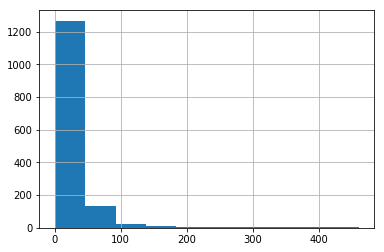

In [23]:
df_train['total_cases'].hist()

In [24]:
df_train.iloc[:,4:12].describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000


In [25]:
df_train.iloc[:,12:18].describe()

,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg
count,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000
mean,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427
std,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494
min,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714
25%,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143
50%,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143
75%,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214
max,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429


In [26]:
df_train.iloc[:,18:24].describe()

,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


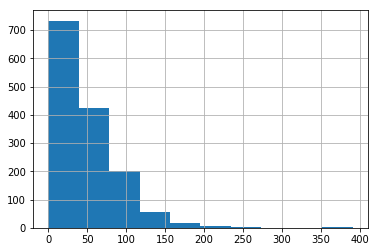

In [27]:
df_train.precipitation_amt_mm.hist()

In [28]:
# get darksky.net historical weather information

# request format:  https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]

# San Juan, Puerto Rico - Latitude: 18.4653, Longitude: -66.1167
# Iquitos, Peru:  - Latitude: -3.74937, Longitude: -73.2444




In [29]:
# this gets current SF weather forecast
# SF: 37.7648, -122.463

# target = 'https://api.darksky.net/forecast/9501b92a37587155d222ae11b77c65a3/37.63474, -122.109015'

# req = requests.get(url=target)
# json_data = json.loads(req.text)
# print(json.dumps(json_data, indent=4, sort_keys=True))


Strategy for additional environmental data:
Collect the dark sky data into a seperate dataframe with daily values for each city
# double check these dates

San Juan first week start date is 1990-04-30 (Monday)
San Juan last week start date is 2008-04-22 (Tuesday)

Iquitos first week start date is 2000-07-01 (Saturday)
Iquitos last week start date is 2010-06-25 (Friday)

The San Juan data is weekly and begins on Monday 1990-04-30 @ 12:00 AM and ends on Sunday 2008-04-28 @ 11:59 PM 
*** there appears to be a discrepancy in the weekly start day from the beginning to the end

The Iquitos data is weekly and begins on Saturday 2000-07-01 @ 12:00 AM and ends on Friday 2010-07-02 @ 11:59 PM
*** there appears to be a discrepancy in the weekly start day from the beginning to the end

I have read that mosquito eggs can stay viable for over a decade, hatching when conditions are acceptable.

I am choosing to gather additional weather data for 1 year prior to the start dates above, so the dates I want weather data for are:

San Juan: 1989-05-01 to 2008-04-28

Iquitos:  1999-06-30 to 2010-07-02


In [30]:
# psuedo code for getting the darksky data at 1K/day

# each record in the training set has the city code and the start day of that week
# convert the start day of week to UNIX epoch timestamp at the city of the record, 
# ie. 2009-04-30 becomes 641433600 (midnight on 4/30/2009)


# make 7 calls to the api, incrementing each by 
# 
# set start year and day for sj and iq
# set end year and day for sj and iq
# make weather_data_df with two columns: index(auto), city, datetime
# for index in weather_data_df:
#   create the url
#   call the api
#   write the data to a df
#   save the df as a csv
# 


In [31]:
# get darksky.net historical weather information
# request format:  https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]

# variables
# San Juan, Puerto Rico - Latitude: 18.4653, Longitude: -66.1167
# Iquitos, Peru:  - Latitude: -3.74937, Longitude: -73.2444


darksky_key = '9501b92a37587155d222ae11b77c65a3'

sj_lat = 18.4653
sj_lon = -66.1167
iq_lat = -3.74937
iq_lon = -73.2444

sj_start = '1989-05-01'
sj_end = '2008-04-28'
iq_start = '1999-06-30'
iq_end = '2010-07-02'

sj_elapsed = pd.Timestamp(sj_end)  - pd.Timestamp(sj_start)
iq_elapsed = pd.Timestamp(iq_end) - pd.Timestamp(iq_start)

sj_day_count = sj_elapsed.days
iq_day_count = iq_elapsed.days


In [32]:
print(sj_day_count)
print(iq_day_count)

6937
4020


In [33]:
sj_day_list = pd.date_range(sj_start, periods=sj_day_count, freq='D')
iq_day_list = pd.date_range(iq_start, periods=iq_day_count, freq='D')

In [34]:
sj_days_df = pd.DataFrame(sj_day_list.astype(str))
iq_days_df = pd.DataFrame(iq_day_list.astype(str))


In [35]:
sj_days_df.head()

,0
0,1989-05-01
1,1989-05-02
2,1989-05-03
3,1989-05-04
4,1989-05-05


In [36]:
sj_days_df.columns = (['date'])
iq_days_df.columns = (['date'])
sj_days_df.columns


Index(['date'], dtype='object')

In [55]:
# this function was throwing an error about halfway through the 6K records for San Juan, stating that there was 
# a key error ['daily']


def get_darksky_data(key, latitude, longitude, days_df, start_index, count):

    start = datetime.datetime.now()
    print('Now obtaining {} days of records from DarkSky'.format(count))

    temp_df = pd.DataFrame()
    current_index = start_index
    for i in range(count):
        day = days_df.iloc[current_index]['date']
        day_string = day + 'T00:00:00'
#         print(day_string)
        target = 'https://api.darksky.net/forecast/' + darksky_key + '/' + str(latitude) + ',' + str(longitude) + ',' + day_string + '?exclude=currently,hourly,flags'
#         print(target)
        req = requests.get(url=target)
        json_data = json.loads(req.text)
#         print(json.dumps(json_data, indent=4, sort_keys=False))

        with open('temp_text.txt', 'a') as the_file:
            the_file.write(json.dumps(json_data, sort_keys=False) + '\n')
    
        current_index += 1
#         print(json_normalize(json_data['daily']['data'], max_level=0))
        
#         if json_data['daily']:
        temp_df = temp_df.append(json_normalize(json_data['daily']['data'], max_level=0), ignore_index=True, verify_integrity=True, sort=False)
#         if i == count // 10:
#             end = datetime.datetime.now()
#             elapsed = end - start
#             remaining = elapsed * 9
#             print('10% of calls took {}'.format(elapsed))
#             print('Remaining 90% is estimated to take another {}'.format(remaining))
    
    end = datetime.datetime.now()
    elapsed = end - start
    print('Obtaining {} days took a total of {}'.format(count, elapsed))

    return temp_df

In [59]:
def darksky_data_to_text_file(key, latitude, longitude, days_df, start_index, count, text_file):
    update_flag = True

    start = datetime.datetime.now()
    print('Now obtaining {} days of records from DarkSky and saving to {}'.format(count, text_file))

#     temp_df = pd.DataFrame()
    current_index = start_index
    for i in range(count):
        day = days_df.iloc[current_index]['date']
        day_string = day + 'T00:00:00'
#         print(day_string)
        target = 'https://api.darksky.net/forecast/' + darksky_key + '/' + str(latitude) + ',' + str(longitude) + ',' + day_string + '?exclude=currently,hourly,flags'
#         print(target)
        req = requests.get(url=target)
        json_data = json.loads(req.text)
#         print(json.dumps(json_data, indent=4, sort_keys=False))

        with open(text_file, 'a') as the_file:
            the_file.write(json.dumps(json_data, sort_keys=False) + '\n')
    
        current_index += 1
#         print(json_normalize(json_data['daily']['data'], max_level=0))
        
#         if json_data['daily']:
#         temp_df = temp_df.append(json_normalize(json_data['daily']['data'], max_level=0), ignore_index=True, verify_integrity=True, sort=False)
        if update_flag:
            if i == count // 10:
                end = datetime.datetime.now()
                elapsed = end - start
                remaining = elapsed * 9
                print('10% of calls took {}'.format(elapsed))
                print('Remaining 90% is estimated to take another {}'.format(remaining))
                update_flag = False
    
    end = datetime.datetime.now()
    elapsed = end - start
    print('Obtaining {} days took a total of {}'.format(count, elapsed))

#     return temp_df

In [60]:
# get the San Juan information from darksky and place in a dataframe
# sj_weather_history = get_darksky_data(darksky_key, sj_lat, sj_lon, sj_days_df, 0, 3) # sj_day_count

# get the San Juan information from . darksky and save to a text file
darksky_data_to_text_file(darksky_key, sj_lat, sj_lon, sj_days_df, 0, sj_day_count, 'sj_darksky.txt')


Now obtaining 6937 days of records from DarkSky
10% of calls took 0:07:08.402946
Remaining 90% is estimated to take another 1:04:15.626514
Obtaining 6937 days took a total of 1:17:05.351209


In [62]:
# get the Iquitos information from . darksky and save to a text file
darksky_data_to_text_file(darksky_key, iq_lat, iq_lon, iq_days_df, 0, iq_day_count, 'iq_darksky.txt')


Now obtaining 4020 days of records from DarkSky
10% of calls took 0:04:28.999485
Remaining 90% is estimated to take another 0:40:20.995365
Obtaining 4020 days took a total of 0:44:16.815665


11,000 days of dark sky data can be done in 11 daily chunks of 1,000

Each 1K chunk should take approximately 10 minutes

or 6,937 should take about 65 minutes.





In [44]:
sj_weather_history.describe()

,time,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,temperatureHigh,temperatureHighTime,...,uvIndex,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,1.200000e+01,30.000000,30.000000,3.000000e+01,...,30.000000,3.000000e+01,30.000000,3.000000e+01,30.000000,3.000000e+01,30.000000,3.000000e+01,30.000000,3.000000e+01
mean,6.112512e+08,6.112724e+08,6.113192e+08,0.501000,0.005220,0.066287,6.110772e+08,0.400000,86.863000,6.112973e+08,...,8.633333,6.112948e+08,73.288667,6.112672e+08,86.863000,6.112973e+08,74.468667,6.112690e+08,91.278333,6.112978e+08
std,7.606145e+05,7.604447e+05,7.608145e+05,0.285541,0.011884,0.136577,9.779230e+05,0.498273,3.801265,7.593640e+05,...,2.059182,7.607669e+05,1.534144,7.636424e+05,3.801265,7.593640e+05,1.602355,7.623117e+05,4.410099,7.610145e+05
min,6.099984e+08,6.100199e+08,6.100660e+08,0.020000,0.000000,0.000000,6.100056e+08,0.000000,78.000000,6.100488e+08,...,5.000000,6.100380e+08,69.870000,6.100092e+08,78.000000,6.100488e+08,70.810000,6.100092e+08,79.480000,6.100488e+08
25%,6.106248e+08,6.106461e+08,6.106926e+08,0.267500,0.000000,0.000000,6.103395e+08,0.000000,83.910000,6.106752e+08,...,6.000000,6.106680e+08,72.950000,6.106365e+08,83.910000,6.106752e+08,73.845000,6.106365e+08,88.340000,6.106716e+08
50%,6.112512e+08,6.112723e+08,6.113191e+08,0.495000,0.000000,0.000000,6.105654e+08,0.000000,85.900000,6.112944e+08,...,10.000000,6.112944e+08,73.810000,6.112656e+08,85.900000,6.112944e+08,74.895000,6.112674e+08,90.600000,6.112980e+08
75%,6.118776e+08,6.118986e+08,6.119457e+08,0.732500,0.003175,0.052125,6.122286e+08,1.000000,89.870000,6.119280e+08,...,10.000000,6.119208e+08,74.642500,6.118938e+08,89.870000,6.119280e+08,75.770000,6.118938e+08,95.155000,6.119289e+08
max,6.125040e+08,6.125249e+08,6.125723e+08,0.980000,0.053800,0.460900,6.125400e+08,1.000000,92.950000,6.125328e+08,...,11.000000,6.125472e+08,75.780000,6.125508e+08,92.950000,6.125328e+08,76.940000,6.125508e+08,99.180000,6.125364e+08


In [ ]:
# save this example of the json object returned by the darksky api

# {
#     "latitude": 18.4653,
#     "longitude": -66.1167,
#     "timezone": "America/Puerto_Rico",
#     "daily": {
#         "data": [
#             {
#                 "time": 609998400,
#                 "summary": "Drizzle in the morning.",
#                 "icon": "rain",
#                 "sunriseTime": 610019894,
#                 "sunsetTime": 610066033,
#                 "moonPhase": 0.87,
#                 "precipIntensity": 0.001,
#                 "precipIntensityMax": 0.0118,
#                 "precipIntensityMaxTime": 610005600,
#                 "precipProbability": 1,
#                 "precipType": "rain",
#                 "temperatureHigh": 85.9,
#                 "temperatureHighTime": 610048800,
#                 "temperatureLow": 72.95,
#                 "temperatureLowTime": 610095600,
#                 "apparentTemperatureHigh": 88.2,
#                 "apparentTemperatureHighTime": 610048800,
#                 "apparentTemperatureLow": 74.07,
#                 "apparentTemperatureLowTime": 610095600,
#                 "dewPoint": 70.15,
#                 "humidity": 0.77,
#                 "pressure": 1017,
#                 "windSpeed": 10.32,
#                 "windBearing": 110,
#                 "cloudCover": 0.41,
#                 "uvIndex": 6,
#                 "uvIndexTime": 610038000,
#                 "temperatureMin": 72.95,
#                 "temperatureMinTime": 610009200,
#                 "temperatureMax": 85.9,
#                 "temperatureMaxTime": 610048800,
#                 "apparentTemperatureMin": 74.36,
#                 "apparentTemperatureMinTime": 610009200,
#                 "apparentTemperatureMax": 88.2,
#                 "apparentTemperatureMaxTime": 610048800
#             }
#         ]
#     },
#     "offset": -4
# }

In [145]:
test_run['date'] = pd.to_datetime(test_run['time'],unit='s')

In [146]:
test_run.head()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,date
0,609998400,Drizzle in the morning.,rain,610019894,610066033,0.87,0.0010,0.0118,610005600.0,1,...,610038000,72.95,610009200,85.90,610048800,74.36,610009200,88.20,610048800,1989-05-01 04:00:00
1,610084800,Light rain overnight.,partly-cloudy-day,610106262,610152453,0.90,0.0000,0.0000,NaN,0,...,610128000,72.95,610095600,83.91,610131600,74.07,610095600,88.19,610131600,1989-05-02 04:00:00
2,610171200,Light rain overnight.,rain,610192631,610238873,0.94,0.0038,0.0906,610178400.0,1,...,610214400,72.95,610182000,83.91,610221600,74.07,610192800,88.19,610221600,1989-05-03 04:00:00
3,610257600,Light rain in the morning.,rain,610279000,610325294,0.98,0.0054,0.0590,610261200.0,1,...,610304400,71.85,610268400,82.86,610286400,73.02,610279200,87.50,610286400,1989-05-04 04:00:00
4,610344000,Light rain in the morning.,rain,610365371,610411715,0.02,0.0013,0.0197,610365600.0,1,...,610390800,71.85,610365600,83.91,610390800,73.15,610365600,87.67,610390800,1989-05-05 04:00:00


In [147]:
test_run = test_run.set_index('date').reset_index()

In [149]:
# test_run.head(30)

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,...,uvIndex,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1989-05-01 04:00:00,609998400,Drizzle in the morning.,rain,610019894,610066033,0.87,0.0010,0.0118,610005600.0,...,6,610038000,72.95,610009200,85.90,610048800,74.36,610009200,88.20,610048800
1,1989-05-02 04:00:00,610084800,Light rain overnight.,partly-cloudy-day,610106262,610152453,0.90,0.0000,0.0000,NaN,...,10,610128000,72.95,610095600,83.91,610131600,74.07,610095600,88.19,610131600
2,1989-05-03 04:00:00,610171200,Light rain overnight.,rain,610192631,610238873,0.94,0.0038,0.0906,610178400.0,...,10,610214400,72.95,610182000,83.91,610221600,74.07,610192800,88.19,610221600
3,1989-05-04 04:00:00,610257600,Light rain in the morning.,rain,610279000,610325294,0.98,0.0054,0.0590,610261200.0,...,10,610304400,71.85,610268400,82.86,610286400,73.02,610279200,87.50,610286400
4,1989-05-05 04:00:00,610344000,Light rain in the morning.,rain,610365371,610411715,0.02,0.0013,0.0197,610365600.0,...,10,610390800,71.85,610365600,83.91,610390800,73.15,610365600,87.67,610390800
5,1989-05-06 04:00:00,610430400,"Heavy rain until morning, starting again in th...",rain,610451742,610498137,0.06,0.0077,0.1417,610509600.0,...,9,610470000,71.85,610441200,83.91,610470000,72.86,610452000,86.54,610470000
6,1989-05-07 04:00:00,610516800,"Light rain until morning, starting again in th...",rain,610538114,610584558,0.10,0.0226,0.4609,610520400.0,...,6,610556400,70.94,610531200,80.85,610574400,72.15,610538400,84.30,610574400
7,1989-05-08 04:00:00,610603200,Partly cloudy throughout the day.,rain,610624488,610670980,0.13,0.0010,0.0118,610610400.0,...,10,610646400,69.87,610614000,84.84,610653600,70.81,610614000,88.76,610653600
8,1989-05-09 04:00:00,610689600,Partly cloudy throughout the day.,partly-cloudy-day,610710862,610757402,0.17,0.0000,0.0000,NaN,...,10,610732800,69.87,610704000,84.84,610740000,70.81,610704000,88.87,610725600
9,1989-05-10 04:00:00,610776000,Mostly cloudy throughout the day.,partly-cloudy-day,610797237,610843824,0.20,0.0000,0.0000,NaN,...,9,610815600,70.97,610790400,86.99,610826400,72.01,610790400,90.60,610815600


In [150]:
test_run.to_csv('test_run.csv')

In [160]:
# check the file
df_inspect = pd.read_csv('test_run.csv', index_col=0)

In [161]:
df_inspect.head(10)

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,...,uvIndex,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1989-05-01 04:00:00,609998400,Drizzle in the morning.,rain,610019894,610066033,0.87,0.0010,0.0118,610005600.0,...,6,610038000,72.95,610009200,85.90,610048800,74.36,610009200,88.20,610048800
1,1989-05-02 04:00:00,610084800,Light rain overnight.,partly-cloudy-day,610106262,610152453,0.90,0.0000,0.0000,NaN,...,10,610128000,72.95,610095600,83.91,610131600,74.07,610095600,88.19,610131600
2,1989-05-03 04:00:00,610171200,Light rain overnight.,rain,610192631,610238873,0.94,0.0038,0.0906,610178400.0,...,10,610214400,72.95,610182000,83.91,610221600,74.07,610192800,88.19,610221600
3,1989-05-04 04:00:00,610257600,Light rain in the morning.,rain,610279000,610325294,0.98,0.0054,0.0590,610261200.0,...,10,610304400,71.85,610268400,82.86,610286400,73.02,610279200,87.50,610286400
4,1989-05-05 04:00:00,610344000,Light rain in the morning.,rain,610365371,610411715,0.02,0.0013,0.0197,610365600.0,...,10,610390800,71.85,610365600,83.91,610390800,73.15,610365600,87.67,610390800
5,1989-05-06 04:00:00,610430400,"Heavy rain until morning, starting again in th...",rain,610451742,610498137,0.06,0.0077,0.1417,610509600.0,...,9,610470000,71.85,610441200,83.91,610470000,72.86,610452000,86.54,610470000
6,1989-05-07 04:00:00,610516800,"Light rain until morning, starting again in th...",rain,610538114,610584558,0.10,0.0226,0.4609,610520400.0,...,6,610556400,70.94,610531200,80.85,610574400,72.15,610538400,84.30,610574400
7,1989-05-08 04:00:00,610603200,Partly cloudy throughout the day.,rain,610624488,610670980,0.13,0.0010,0.0118,610610400.0,...,10,610646400,69.87,610614000,84.84,610653600,70.81,610614000,88.76,610653600
8,1989-05-09 04:00:00,610689600,Partly cloudy throughout the day.,partly-cloudy-day,610710862,610757402,0.17,0.0000,0.0000,NaN,...,10,610732800,69.87,610704000,84.84,610740000,70.81,610704000,88.87,610725600
9,1989-05-10 04:00:00,610776000,Mostly cloudy throughout the day.,partly-cloudy-day,610797237,610843824,0.20,0.0000,0.0000,NaN,...,9,610815600,70.97,610790400,86.99,610826400,72.01,610790400,90.60,610815600
